<a href="https://colab.research.google.com/github/tomaszpionka/ds-project/blob/main/wum0s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Polecana literatura:
* Python Data Science Handbook, Jake VanderPlas,  O’Reilly Media
* "An Introduction to statistical learning", G.James et al.
* Deep learning, Ian Goodfellow and Yoshua Bengio and Aaron Courville, MIT Press
* Deep learning with PyTorch,  Eli Stevens et al. Manning
* dokumnentacja PyTorch, numpy, pandas, python....


# Numpy

In [1]:
import numpy as np
 
x=np.array([[1,2,3], [4,5,6]])
print(x)
print(x.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [ ]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [2]:
np.arange(2,10,2)

array([2, 4, 6, 8])

In [ ]:
np.array([range(i, i + 4) for i in [1, 4, 36]])

array([[ 1,  2,  3,  4],
       [ 4,  5,  6,  7],
       [36, 37, 38, 39]])

In [ ]:
np.array([1,2,3]) +3.5 #broadcasting

array([4.5, 5.5, 6.5])


1. 
a) **Utwórz** tablicę w numpy o wymiarach (5,4) automatycznie uzupełniając ją kolejnymi liczbami od 1 do 20. Możesz wykorzystać np arange i reshape. 

  Następnie, do każdej wartości w pierwszej i ostatniej kolumnie dodaj 1. Wykorzystaj broadcasting i odpowiedni wektor. Wyswietl otrzymaną tablicę. W zadanniu nie używaj pętli.

In [ ]:
np.arange(1,21,1).reshape(4,5) + [1,0,0,0,1]

array([[ 2,  2,  3,  4,  6],
       [ 7,  7,  8,  9, 11],
       [12, 12, 13, 14, 16],
       [17, 17, 18, 19, 21]])

b) Jeśli to możliwe, dla poniższych macierzy wykonaj kolejne operacje:
- A+B
- B-A
- B/2
- AB -mnożenie macierzy
- C=AB.T - mnożenie macierzy A i transponowanej B
- det(C) -wyznacznik macierzynp.linalg
- iloczyn po współrzędnych(Hadamarda) macierzy A i B



In [3]:
A = np.array( ((1,3,1), (-1, 2,2)))
B = np.array(((1,2, -2), (1,1, 1)))

In [22]:
np.add(A,B)

array([[ 2,  5, -1],
       [ 0,  3,  3]])

In [21]:
np.subtract(B,A)

array([[ 0, -1, -3],
       [ 2, -1, -1]])

In [7]:
B/2

array([[ 0.5,  1. , -1. ],
       [ 0.5,  0.5,  0.5]])

In [28]:
# nie można pomnożyć inaczej niż współczynnikami Hadamarda

In [27]:
C = A.dot(B.T)
C

array([[ 5,  5],
       [-1,  3]])

In [12]:
np.linalg.det(C)

19.999999999999996

In [13]:
np.multiply(A,B)

array([[ 1,  6, -2],
       [-1,  2,  2]])

# Pandas i wczytywanie danych do colab

2. Wczytaj pliki pogoda.csv pogoda2.csv na Google drive lub otwórz bezpośrednio   z lokalnego dysku. Znajdz w panelu "Code snippets" (z lewej) jak to zrobić. 

  Wykorzystując bibliotekę pandas wczytaj dane z pliku *pogoda.csv* i utwórz dataframe o nazwie **A**. Dodaj(append) do **A** dane ze słownika **B**(podany poniżej) i zapisz jako **A**. Wczytaj dane z pliku pogoda2 do dataframe o nazwie **C**.  Połącz **A** i **C** według kolumny *godzina* zachowując podobne formatowanie danych*.

In [ ]:
 B=[{"godzina":"10:00:00 AM", "temperatura [C]":19,  "szansa opadów [%]":0} , {"godzina":"11:00:00 AM", "temperatura [C]":22,  "szansa opadów [%]":0} ]

In [ ]:
import pandas as pd

A = pd.read_csv("https://raw.githubusercontent.com/tomaszpionka/ds-project/main/pogoda.csv")

C = pd.read_csv("https://raw.githubusercontent.com/tomaszpionka/ds-project/main/pogoda2.csv")

B = pd.DataFrame.from_dict(B)
A = A.append(B, ignore_index=True)

result = pd.concat([A, C], axis=1, ignore_index=True)

from datetime import datetime
# A = pd.to_datetime(A['godzina']).dt.strftime('%H:%M:%S')
A['godzina'] = A['godzina'].apply(lambda x: datetime.strptime(x, '%H:%M:%S %p').strftime('%H:%M'))

D = pd.merge(A, C, left_on='godzina', right_on='godzina')
D

,godzina,temperatura [C],szansa opadów [%],wiatr [km/h]
0,01:00,11,0,5
1,02:00,10,5,5
2,03:00,9,20,10
3,04:00,10,60,50
4,05:00,10,40,20
5,06:00,11,20,30
6,07:00,13,20,10
7,08:00,15,10,10
8,09:00,17,10,5
9,10:00,19,0,5


# Matplotlib

3. Utwórz wspólny wykres funkcji y=$1/(1+e^{-\beta x}) $ w przedziale $<-10,10>$ dla 3 wartości $\beta = [0.1,0.5, 1]$ . Dodaj legendę.

- napisz metodę w python która oblicza powyższą funkcję. 
- utwórz zmienną reprezentującą wartości osi x, wykorzystując numpy.linspace¶
- utwórz 3 wykresy wykorzystując matplotlib.pyplot
- dodaj legendę i oznaczenia osi

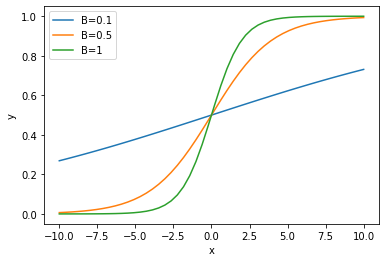

In [39]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10) 
 
def fun_calc(x,b):
  return 1/(1+(np.exp(-1*b*x)))
 
beta = [0.1,0.5,1]
for b in beta:
  y = fun_calc(x,b)
  plt.plot(x,y,label="B={}".format(b))
 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()